In [1]:
import pandas as pd

df = pd.read_csv('../data/sierraleone-bumbuna.csv')

# Overview
print(df.head())
print(df.info())


          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
<class 'pandas.core.frame.

In [2]:
print(df.describe())
print(df.isna().sum())

# Columns with >5% missing:
missing_percent = df.isna().mean() * 100
print(missing_percent[missing_percent > 5])

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.1000

In [3]:
from scipy.stats import zscore

cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

df_z = df[cols].apply(zscore)
outliers = (df_z.abs() > 3).any(axis=1)

print(f"Number of outliers: {outliers.sum()}")

Number of outliers: 16292


In [4]:
for col in cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

df_clean = df[~outliers]

C:\Users\Dawa Cloud\AppData\Local\Temp\ipykernel_12060\3728258679.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\Dawa Cloud\AppData\Local\Temp\ipykernel_12060\3728258679.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

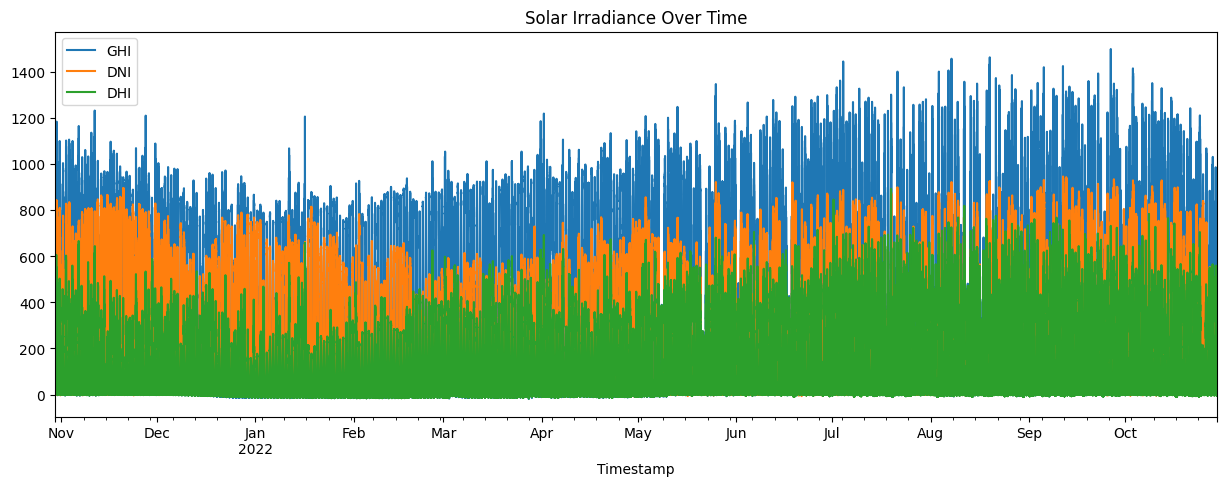

In [5]:
import matplotlib.pyplot as plt

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

df[['GHI', 'DNI', 'DHI']].plot(figsize=(15,5))
plt.title("Solar Irradiance Over Time")
plt.show()


                ModA        ModB
Cleaning                        
0         206.578599  198.038150
1         273.309252  277.231102


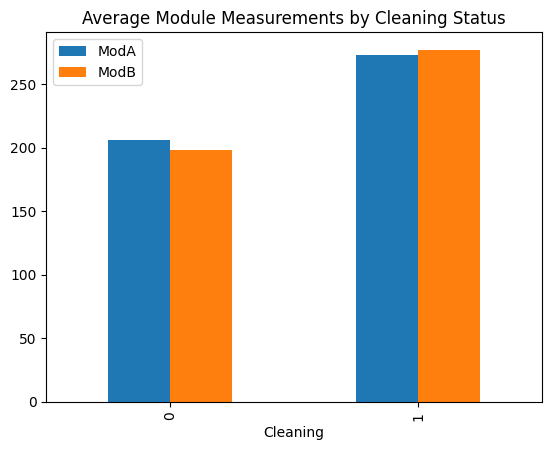

In [6]:
cleaning_group = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
print(cleaning_group)
cleaning_group.plot(kind='bar')
plt.title('Average Module Measurements by Cleaning Status')
plt.show()


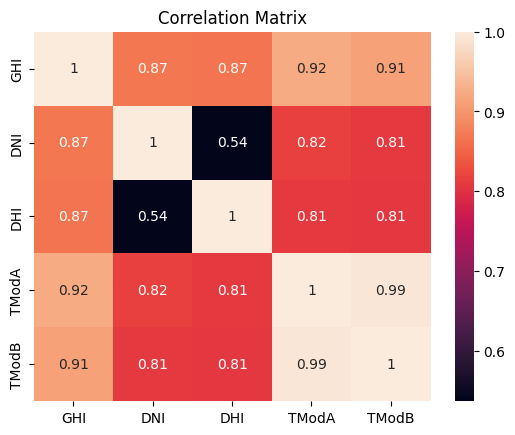

In [7]:
import seaborn as sns

corr = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()


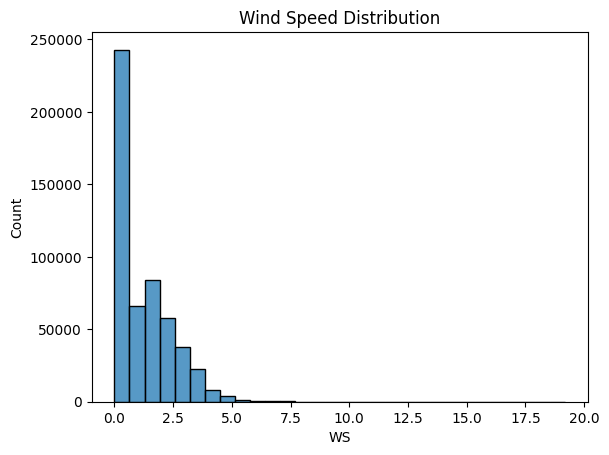

In [8]:
sns.histplot(df['WS'], bins=30)
plt.title("Wind Speed Distribution")
plt.show()


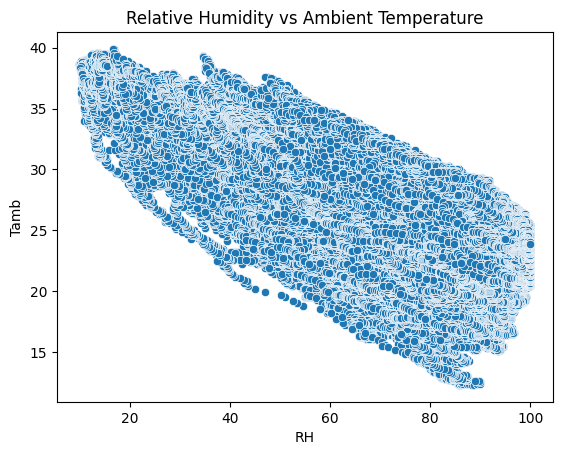

In [9]:
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title("Relative Humidity vs Ambient Temperature")
plt.show()


In [11]:
df_clean.to_csv('../data/sieraleone_clean.csv', index=False)
